In [16]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing  
!pip install category_encoders

     -------------------------------------- 81.2/81.2 kB 650.8 kB/s eta 0:00:00


In [6]:
cloth=pd.read_csv('Company_Data.csv')
cloth

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [9]:
sales_val=[]
for value in cloth['Sales']:
    if value<=8:
        sales_val.append('low')
    else:
        sales_val.append('high')
cloth['sales_val']=sales_val

In [10]:
cloth

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,high
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,low


In [17]:
import category_encoders as ce
encoder= ce.OrdinalEncoder(cols=['ShelveLoc','Urban','US'])
cloth1=encoder.fit_transform(cloth)

In [19]:
cloth1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,high
396,6.14,139,23,3,37,120,3,55,11,2,1,low
397,7.41,162,26,12,368,159,3,40,18,1,1,low
398,5.94,100,79,7,284,95,1,50,12,1,1,low


In [20]:
cloth1=cloth1.drop(['Sales'], axis=1)

In [21]:
cloth1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_val
0,138,73,11,276,120,1,42,17,1,1,high
1,111,48,16,260,83,2,65,10,1,1,high
2,113,35,10,269,80,3,59,12,1,1,high
3,117,100,4,466,97,3,55,14,1,1,low
4,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,high
396,139,23,3,37,120,3,55,11,2,1,low
397,162,26,12,368,159,3,40,18,1,1,low
398,100,79,7,284,95,1,50,12,1,1,low


In [24]:
x=cloth1.iloc[:, :-1]
y=cloth1.iloc[:, -1]

In [25]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [26]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: sales_val, Length: 400, dtype: object

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

### Building Decision Tree Classifier using Entropy criteria

In [45]:
model=DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

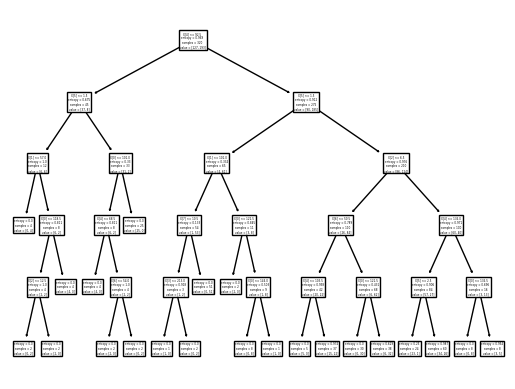

In [46]:
tree.plot_tree(model)
plt.show()

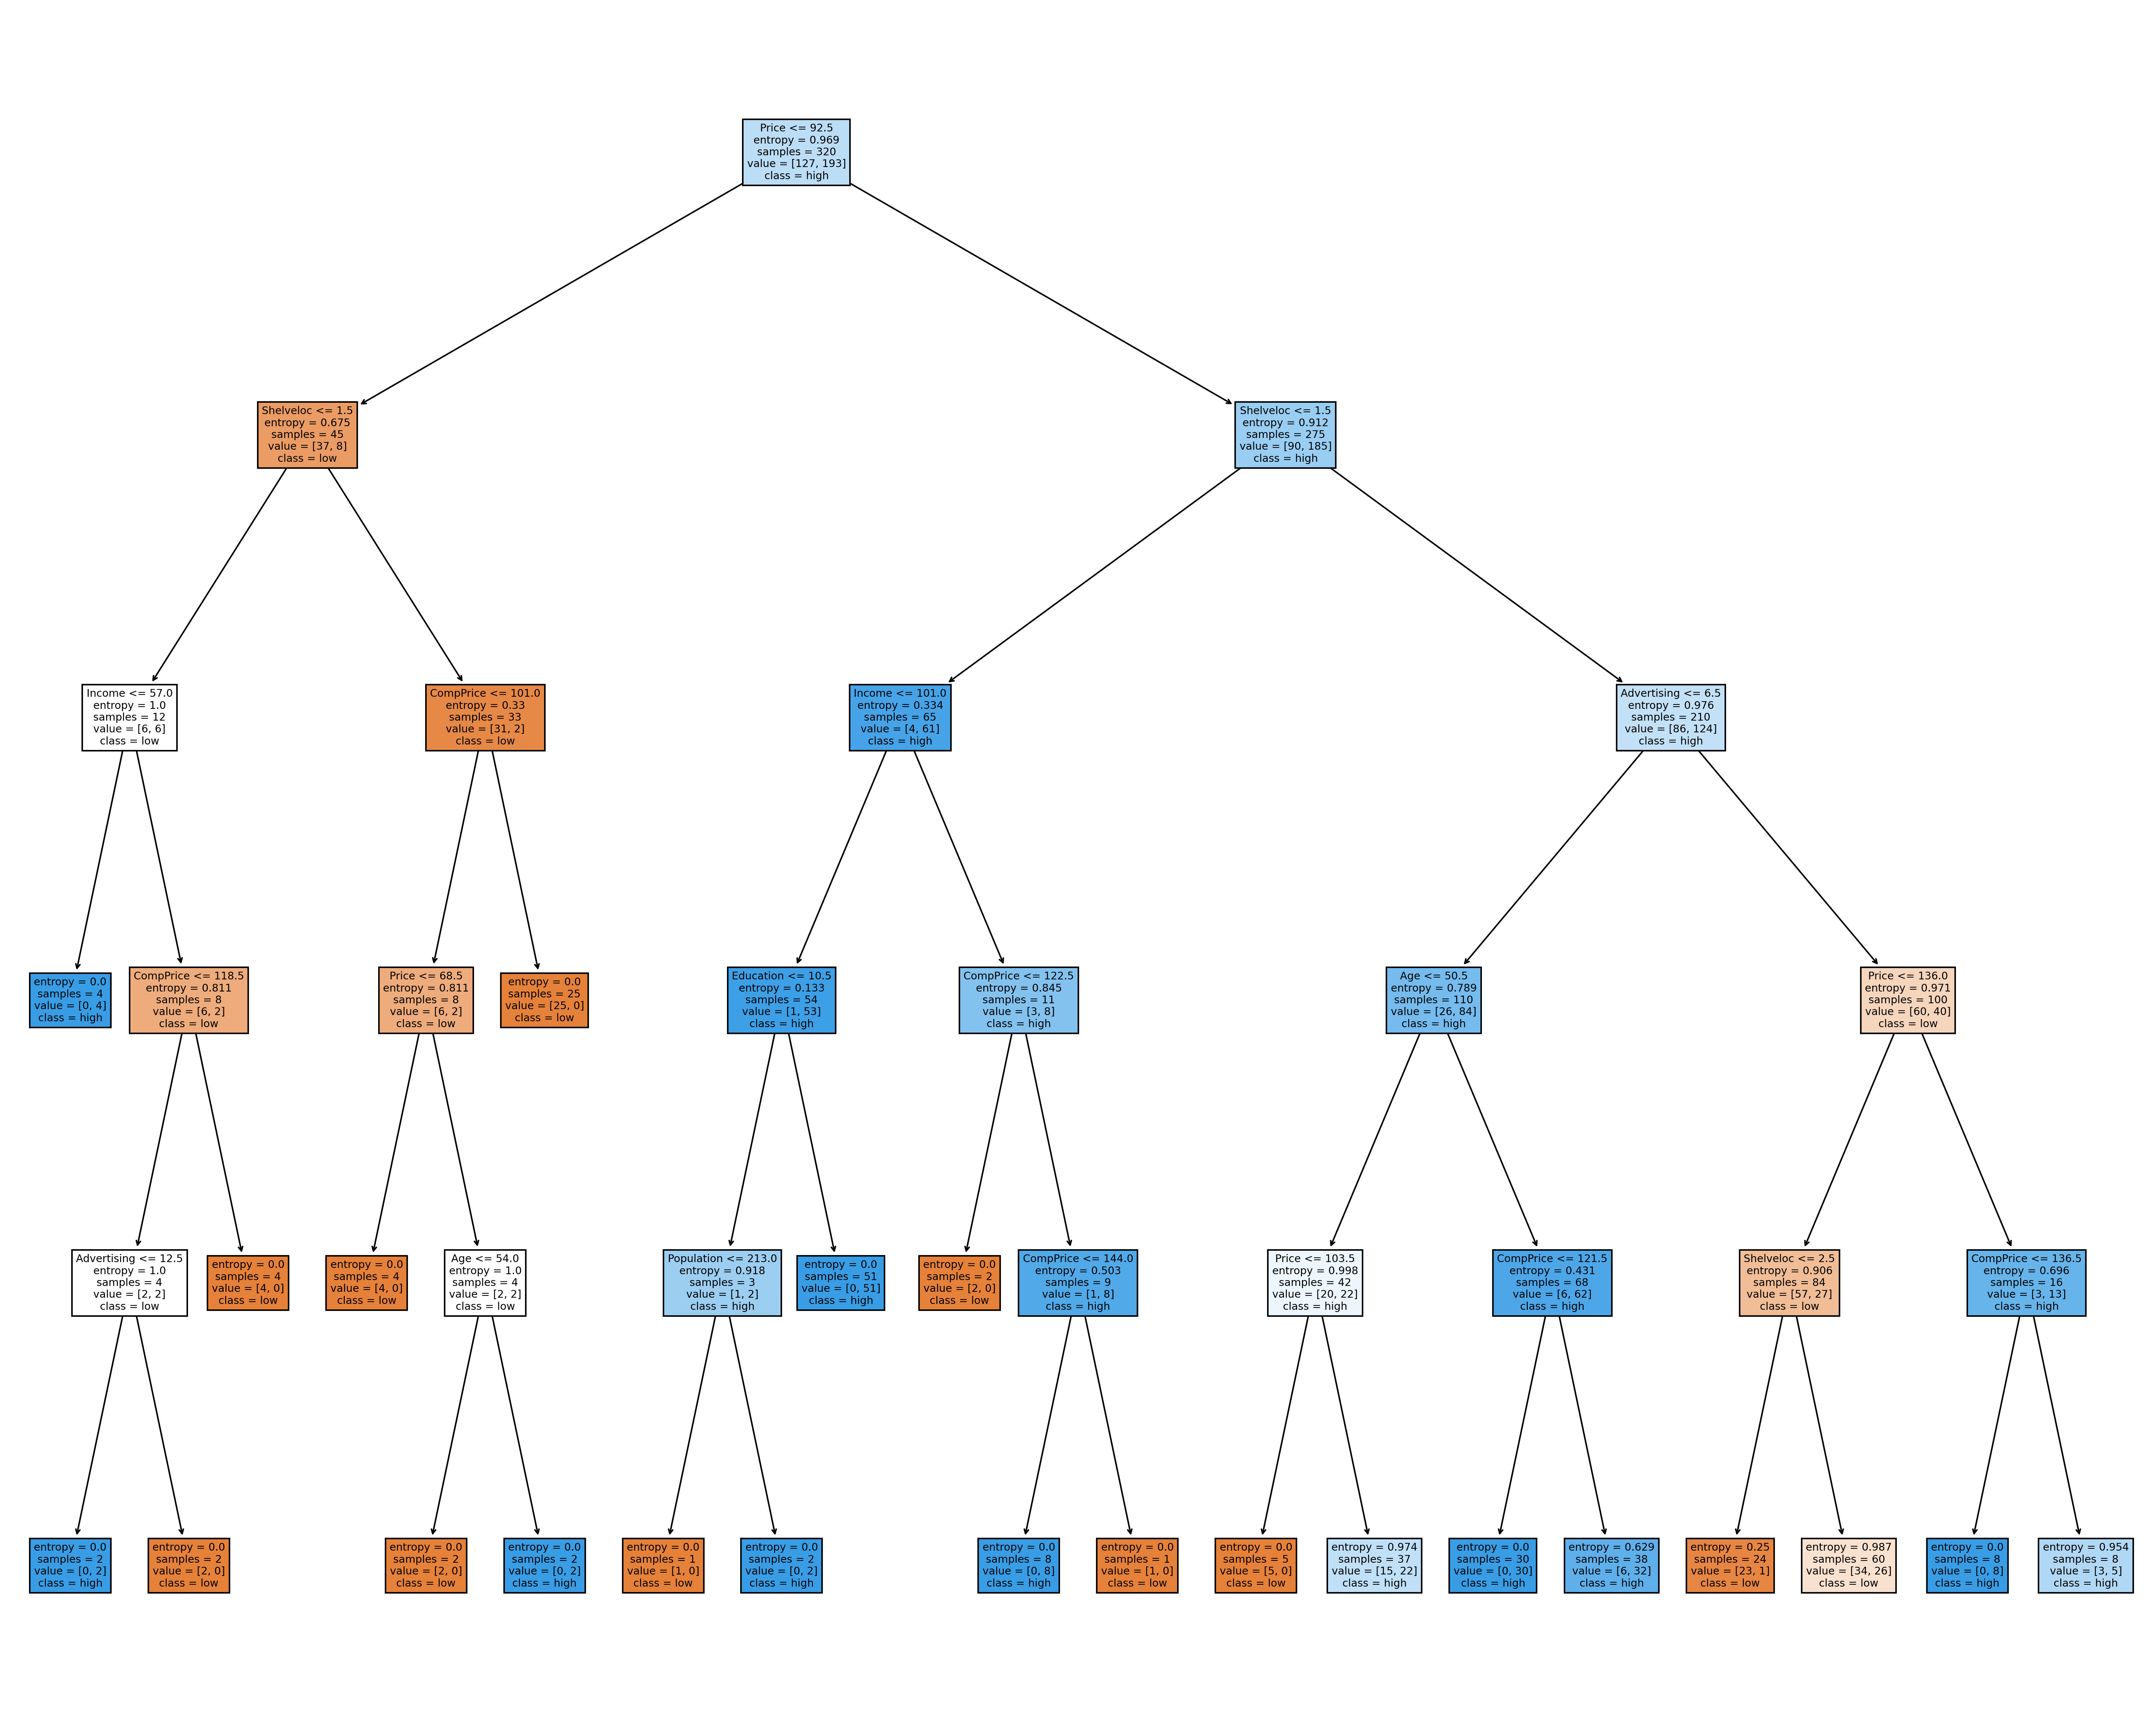

In [50]:
fn=['CompPrice','Income','Advertising','Population','Price','Shelveloc','Age','Education','Urban','US']
cn=['low','high']
fig, axes= plt.subplots(nrows=1,ncols=1,figsize=(25,20), dpi=300)
tree.plot_tree(model,
              feature_names=fn,
              class_names=cn,
              filled=True)
plt.show()

In [52]:
text=tree.export_text(model,max_depth=5)
print(text)

|--- feature_4 <= 92.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_1 <= 57.00
|   |   |   |--- class: low
|   |   |--- feature_1 >  57.00
|   |   |   |--- feature_0 <= 118.50
|   |   |   |   |--- feature_2 <= 12.50
|   |   |   |   |   |--- class: low
|   |   |   |   |--- feature_2 >  12.50
|   |   |   |   |   |--- class: high
|   |   |   |--- feature_0 >  118.50
|   |   |   |   |--- class: high
|   |--- feature_5 >  1.50
|   |   |--- feature_0 <= 101.00
|   |   |   |--- feature_4 <= 68.50
|   |   |   |   |--- class: high
|   |   |   |--- feature_4 >  68.50
|   |   |   |   |--- feature_6 <= 54.00
|   |   |   |   |   |--- class: high
|   |   |   |   |--- feature_6 >  54.00
|   |   |   |   |   |--- class: low
|   |   |--- feature_0 >  101.00
|   |   |   |--- class: high
|--- feature_4 >  92.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_1 <= 101.00
|   |   |   |--- feature_7 <= 10.50
|   |   |   |   |--- feature_3 <= 213.00
|   |   |   |   |   |--- class: high
|   |   |   |   |--

In [53]:
model.feature_importances_

array([0.14130835, 0.06038236, 0.14176043, 0.01553813, 0.26584929,
       0.23977438, 0.11040516, 0.0249819 , 0.        , 0.        ])

In [54]:
feature_imp=pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Price          0.265849
Shelveloc      0.239774
Advertising    0.141760
CompPrice      0.141308
Age            0.110405
Income         0.060382
Education      0.024982
Population     0.015538
Urban          0.000000
US             0.000000
dtype: float64

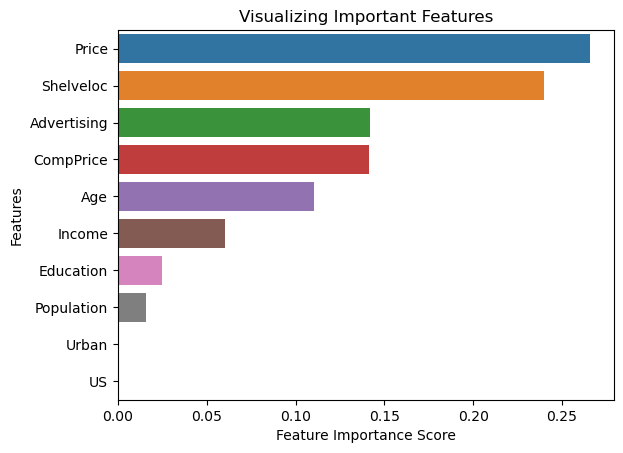

In [55]:
import seaborn as sn
%matplotlib inline
sn.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [56]:
pred=model.predict(x_test)
pd.Series(pred).value_counts()

low     42
high    38
dtype: int64

In [57]:
pred

array(['low', 'low', 'high', 'low', 'low', 'low', 'high', 'low', 'high',
       'low', 'low', 'high', 'high', 'low', 'high', 'high', 'low', 'high',
       'low', 'high', 'high', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'high', 'low', 'high', 'high', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'high', 'high', 'low',
       'high', 'low', 'high', 'low', 'low', 'high', 'high', 'high',
       'high', 'high', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'high', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'low', 'high', 'high', 'low', 'high', 'low', 'high', 'high', 'low',
       'low'], dtype=object)

In [58]:
pd.crosstab(y_test,pred)

col_0,high,low
sales_val,,
high,26,11
low,12,31


In [59]:
#Acurracy
np.mean(pred==y_test)

0.7125

### Building the Decision Tree Classifier(CART) using Gini criteria

In [60]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=5)


In [61]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [63]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.65

In [64]:
model_gini.feature_importances_

array([0.11187779, 0.02687178, 0.20069935, 0.0465379 , 0.33989963,
       0.20582315, 0.0682904 , 0.        , 0.        , 0.        ])